In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import OneHotEncoder


In [2]:

# Load the Titanic dataset
df = pd.read_csv('./titanic_embarked.csv')

# Handle missing values
df = df.dropna(subset=['Age', 'Embarked', 'Survived'])

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[['Sex', 'Embarked']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

# Concatenate encoded features with the original dataframe
df_encoded = pd.concat([df.drop(columns=['Sex', 'Embarked']), encoded_df], axis=1)

# Define features (X) and target (y)
X = df_encoded[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df_encoded['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy: 0.64


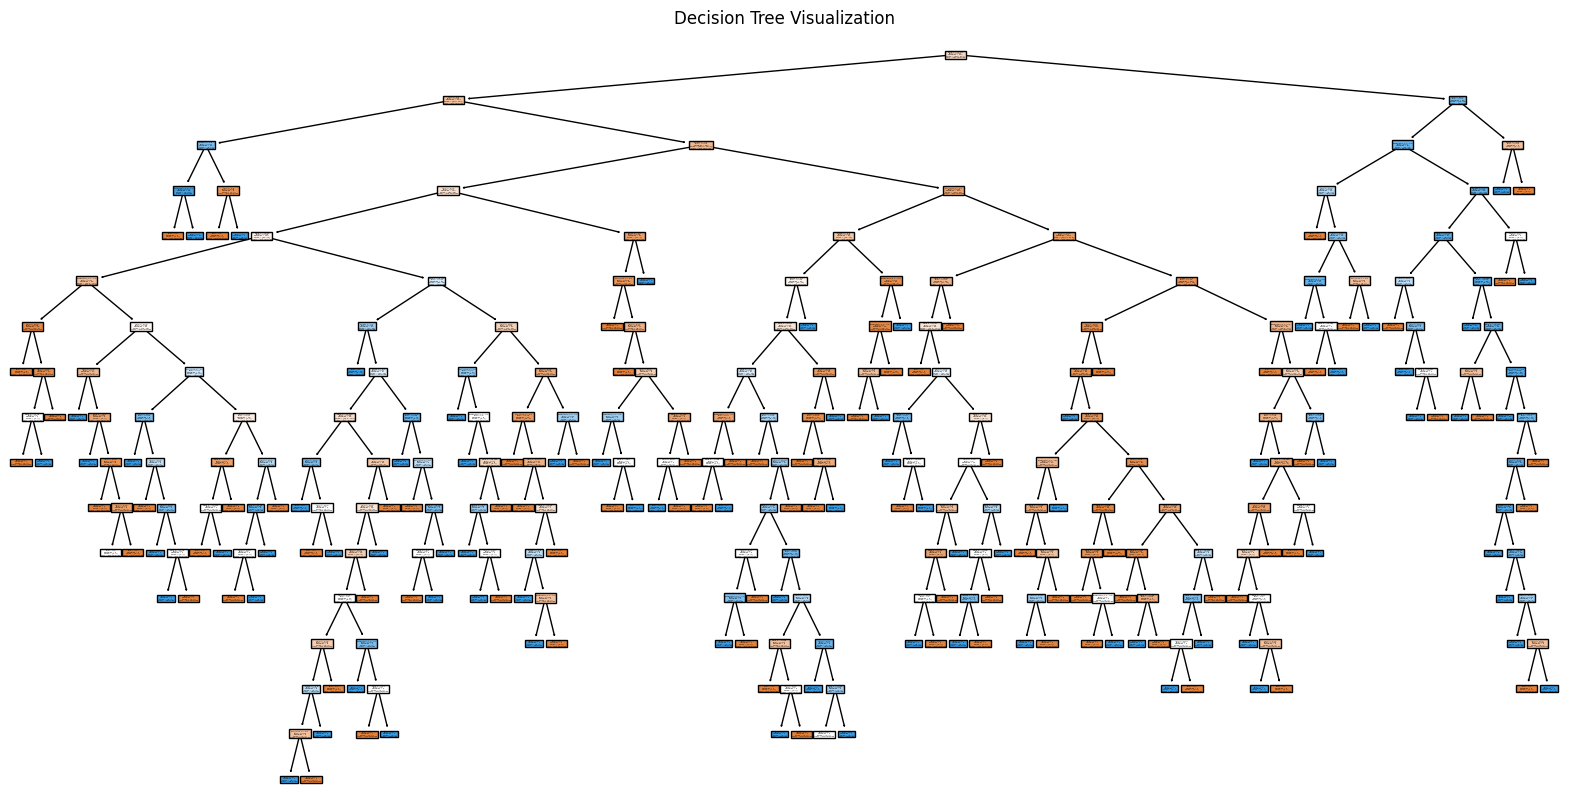

In [4]:

# Drop rows with NaN values in y_train and y_test
X_train = X_train[y_train.notna()]
y_train = y_train.dropna()
X_test = X_test[y_test.notna()]
y_test = y_test.dropna()

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [5]:

# Save the model to a pickle file
with open('decision_tree_titanic_model.pkl', 'wb') as f:
    pickle.dump(clf, f)
print("Model saved to decision_tree_titanic_model.pkl")

# Load the model and make a sample prediction
with open('decision_tree_titanic_model.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)
sample_prediction = loaded_clf.predict(X_test[:1])
print(f"Sample prediction: {sample_prediction}")

Model saved to decision_tree_titanic_model.pkl
Sample prediction: [1.]
